In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(context='poster', rc={'figure.figsize':(12, 10)})

In [56]:
timing_df = pd.read_csv('UMAP Benchmark Results - UMAP January timings.csv')
timing_df

,Size,UMAP Time,UMAP Time.1,UMAP Time.2,UMAP Time.3,UMAP Time.4,tSNE_1,tSNE_2,tSNE_3,tSNE_4,tSNE_5
0,1000,5.43,3.81,3.97,4.02,4.21,22.40,22.68,22.70,22.47,23.16
1,5000,15.30,27.04,25.64,22.68,27.09,140.37,140.95,144.21,165.53,148.74
2,10000,27.63,27.87,27.75,27.61,27.81,496.39,343.00,322.87,352.01,357.04
3,50000,86.31,82.95,81.47,82.43,83.96,2865.83,2841.98,2847.26,2893.39,2846.37
4,100000,200.85,179.41,179.33,180.89,184.09,8517.09,8366.51,8523.89,8534.67,8500.26
5,500000,1105.55,1132.47,1123.78,1122.50,1100.21,167712.86,167564.57,168054.96,168370.23,167231.21
6,1000000,2576.79,2585.25,2565.26,2548.41,2565.14,594813.70,595876.29,595409.81,594691.20,593721.18
7,1500000,4352.81,4340.52,4342.51,4345.73,4300.99,NaN,NaN,NaN,NaN,NaN
8,2000000,6526.14,6431.80,6400.52,6435.94,6404.70,NaN,NaN,NaN,NaN,NaN
9,2500000,8944.85,9038.97,8937.25,9139.82,8966.68,NaN,NaN,NaN,NaN,NaN


In [57]:
umap_timing_df = (timing_df.set_index('Size')[[x for x in timing_df.columns if x.startswith('UMAP')]]
                  .stack().reset_index('Size')).rename(columns={'Size':'size', 0:'time'})
tsne_timing_df = (timing_df.set_index('Size')[[x for x in timing_df.columns if x.startswith('tSNE')]]
                  .stack().reset_index('Size')).rename(columns={'Size':'size', 0:'time'})

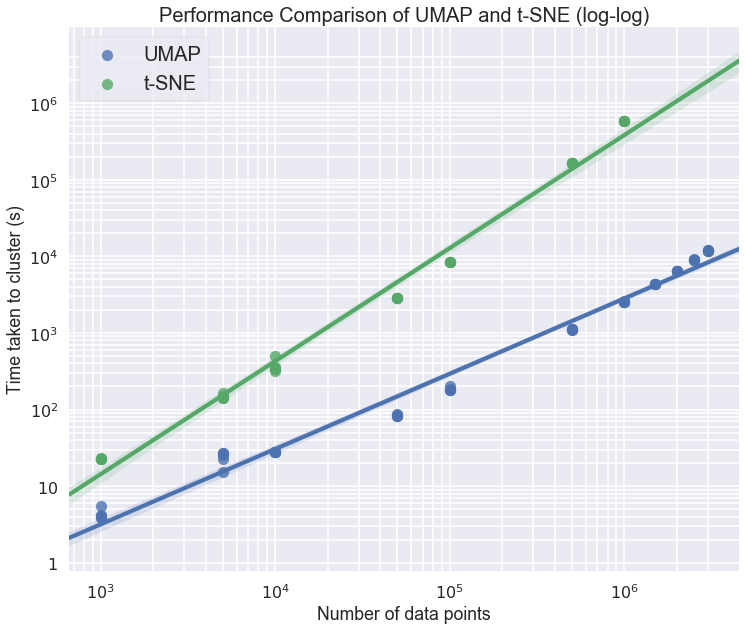

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)

xticks = np.log10(np.hstack([
    np.arange(700, 1000, 100),
    np.arange(1000,10000,1000), 
    np.arange(10000,100000,10000),
    np.arange(100000,1000000,100000),
    np.arange(1000000,4000000,1000000),
    ]))
xtick_labels = [""] * 3 + ["$10^3$"] + [""]*8 + ["$10^4$"] + [""]*8 + ["$10^5$"] + [""]*8 + ["$10^6$"]
yticks = np.log10(np.hstack([
    np.arange(1, 10, 1),
    np.arange(10,100,10),
    np.arange(100, 1000, 100),
    np.arange(1000, 10000, 1000),
    np.arange(10000, 100000, 10000),
    np.arange(100000, 1000000, 100000),
    np.arange(1000000, 5000000, 1000000),
]))
ytick_labels = ["$1$"] + [""]*8 + ["$10$"] +\
                [""]*8 + ["$10^{2}$"] + [""]*8 + ["$10^3$"] +\
                [""]*8 + ["$10^4$"] + [""]*8 + ["$10^5$"] +\
                [""]*8 + ["$10^6$"]

sns.regplot(x='size', y='time', data=np.log10(umap_timing_df), order=1, ax=ax, label='UMAP')
sns.regplot(x='size', y='time', data=np.log10(tsne_timing_df), order=1, ax=ax, label='t-SNE')
ax.set_xlabel('Number of data points')
ax.set_ylabel('Time taken to cluster (s)')
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels);
plt.title('Performance Comparison of UMAP and t-SNE (log-log)', fontsize=20)
plt.legend(loc='best', frameon=True, fancybox=True, fontsize=20)
plt.savefig('performance_comparison.png')

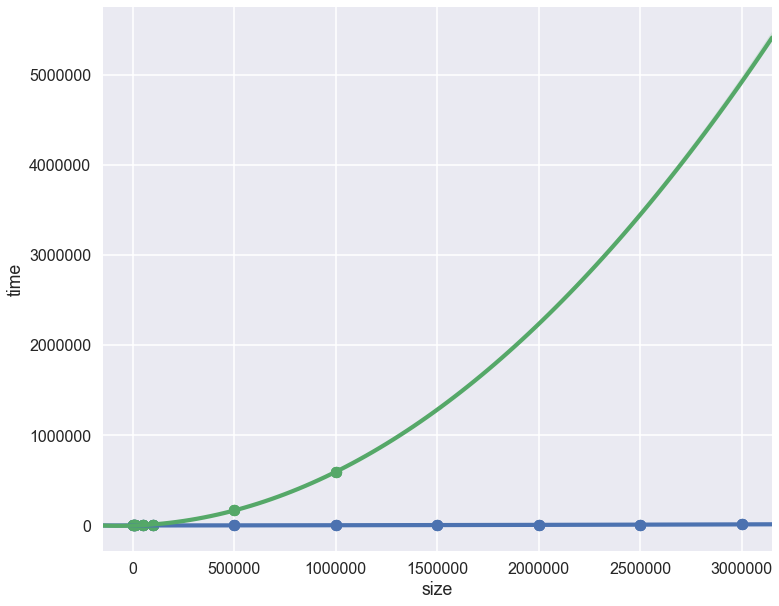

In [59]:
sns.regplot(x='size', y='time', data=(umap_timing_df), order=2)
sns.regplot(x='size', y='time', data=(tsne_timing_df), order=2)